# Cloning an item from an organization

I have a feature layer in one organization. I want to have it in my other ArcGIS Online organization that I use for demos. This notebook shows how to do this using the ArcGIS API for Python.

In [1]:
from arcgis.gis import GIS
from getpass import getpass

## Connect to the source and target ArcGIS Online organizations

In [2]:
gisTarget = GIS(r'https://www.arcgis.com/', 'tkinlaw', getpass())
gisTarget

GIS @ https://kinlaw.maps.arcgis.com version:2025.3

In [3]:
gisSource = GIS(r'https://www.arcgis.com/', 'tkinlaw_EsriEdDelivery', getpass())
gisSource

GIS @ https://EsriEdDelivery.maps.arcgis.com version:2025.3

### Identify the item to clone

<Item title:"RANCHO_BERNARDOTrees_SD_TK" type:Feature Layer Collection owner:tkinlaw_EsriEdDelivery>
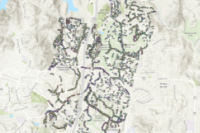

In [4]:
autoFolder = gisSource.content.folders.get(folder='AUTO')
for item in autoFolder.list():
    if item.type =='Feature Service': # there was only 1 feature service in this folder
        itemToClone = item
itemToClone

## Use the target GIS and provide the item from the source

In [5]:
gisTarget.content.clone_items(items = [itemToClone], folder = 'ARPY Demos')

[<Item title:"RANCHO_BERNARDOTrees_SD_TK" type:Feature Layer Collection owner:tkinlaw>]

### Verify that the cloned item is in the target ArcGIS Online organization

In [6]:
gisTarget.content.search(itemToClone.name)

[<Item title:"RANCHO_BERNARDOTrees_SD_TK" type:Feature Layer Collection owner:tkinlaw>]